# LOGISTIC REGRESSION

## Description


Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.


## Code

### Chuẩn bị dữ liệu

In [77]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [78]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [79]:
df = pd.read_csv('data/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [80]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Phân tích mô tả

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

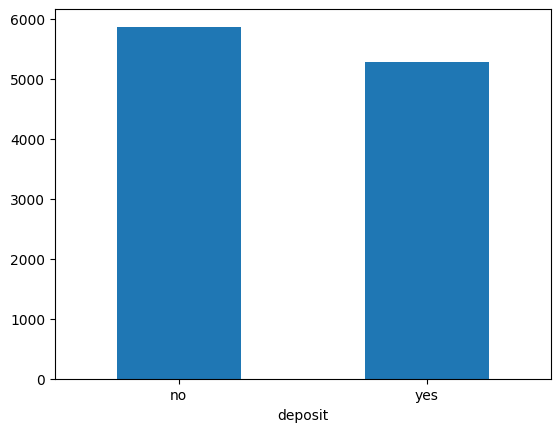

In [82]:
df['deposit'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

<Axes: ylabel='count'>

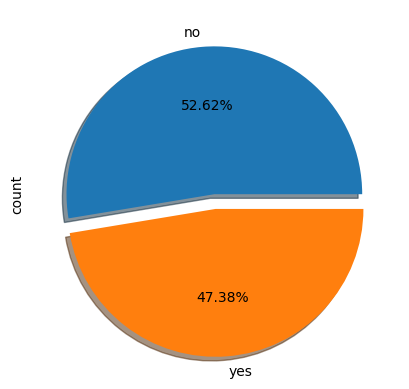

In [83]:
df['deposit'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', shadow=True)

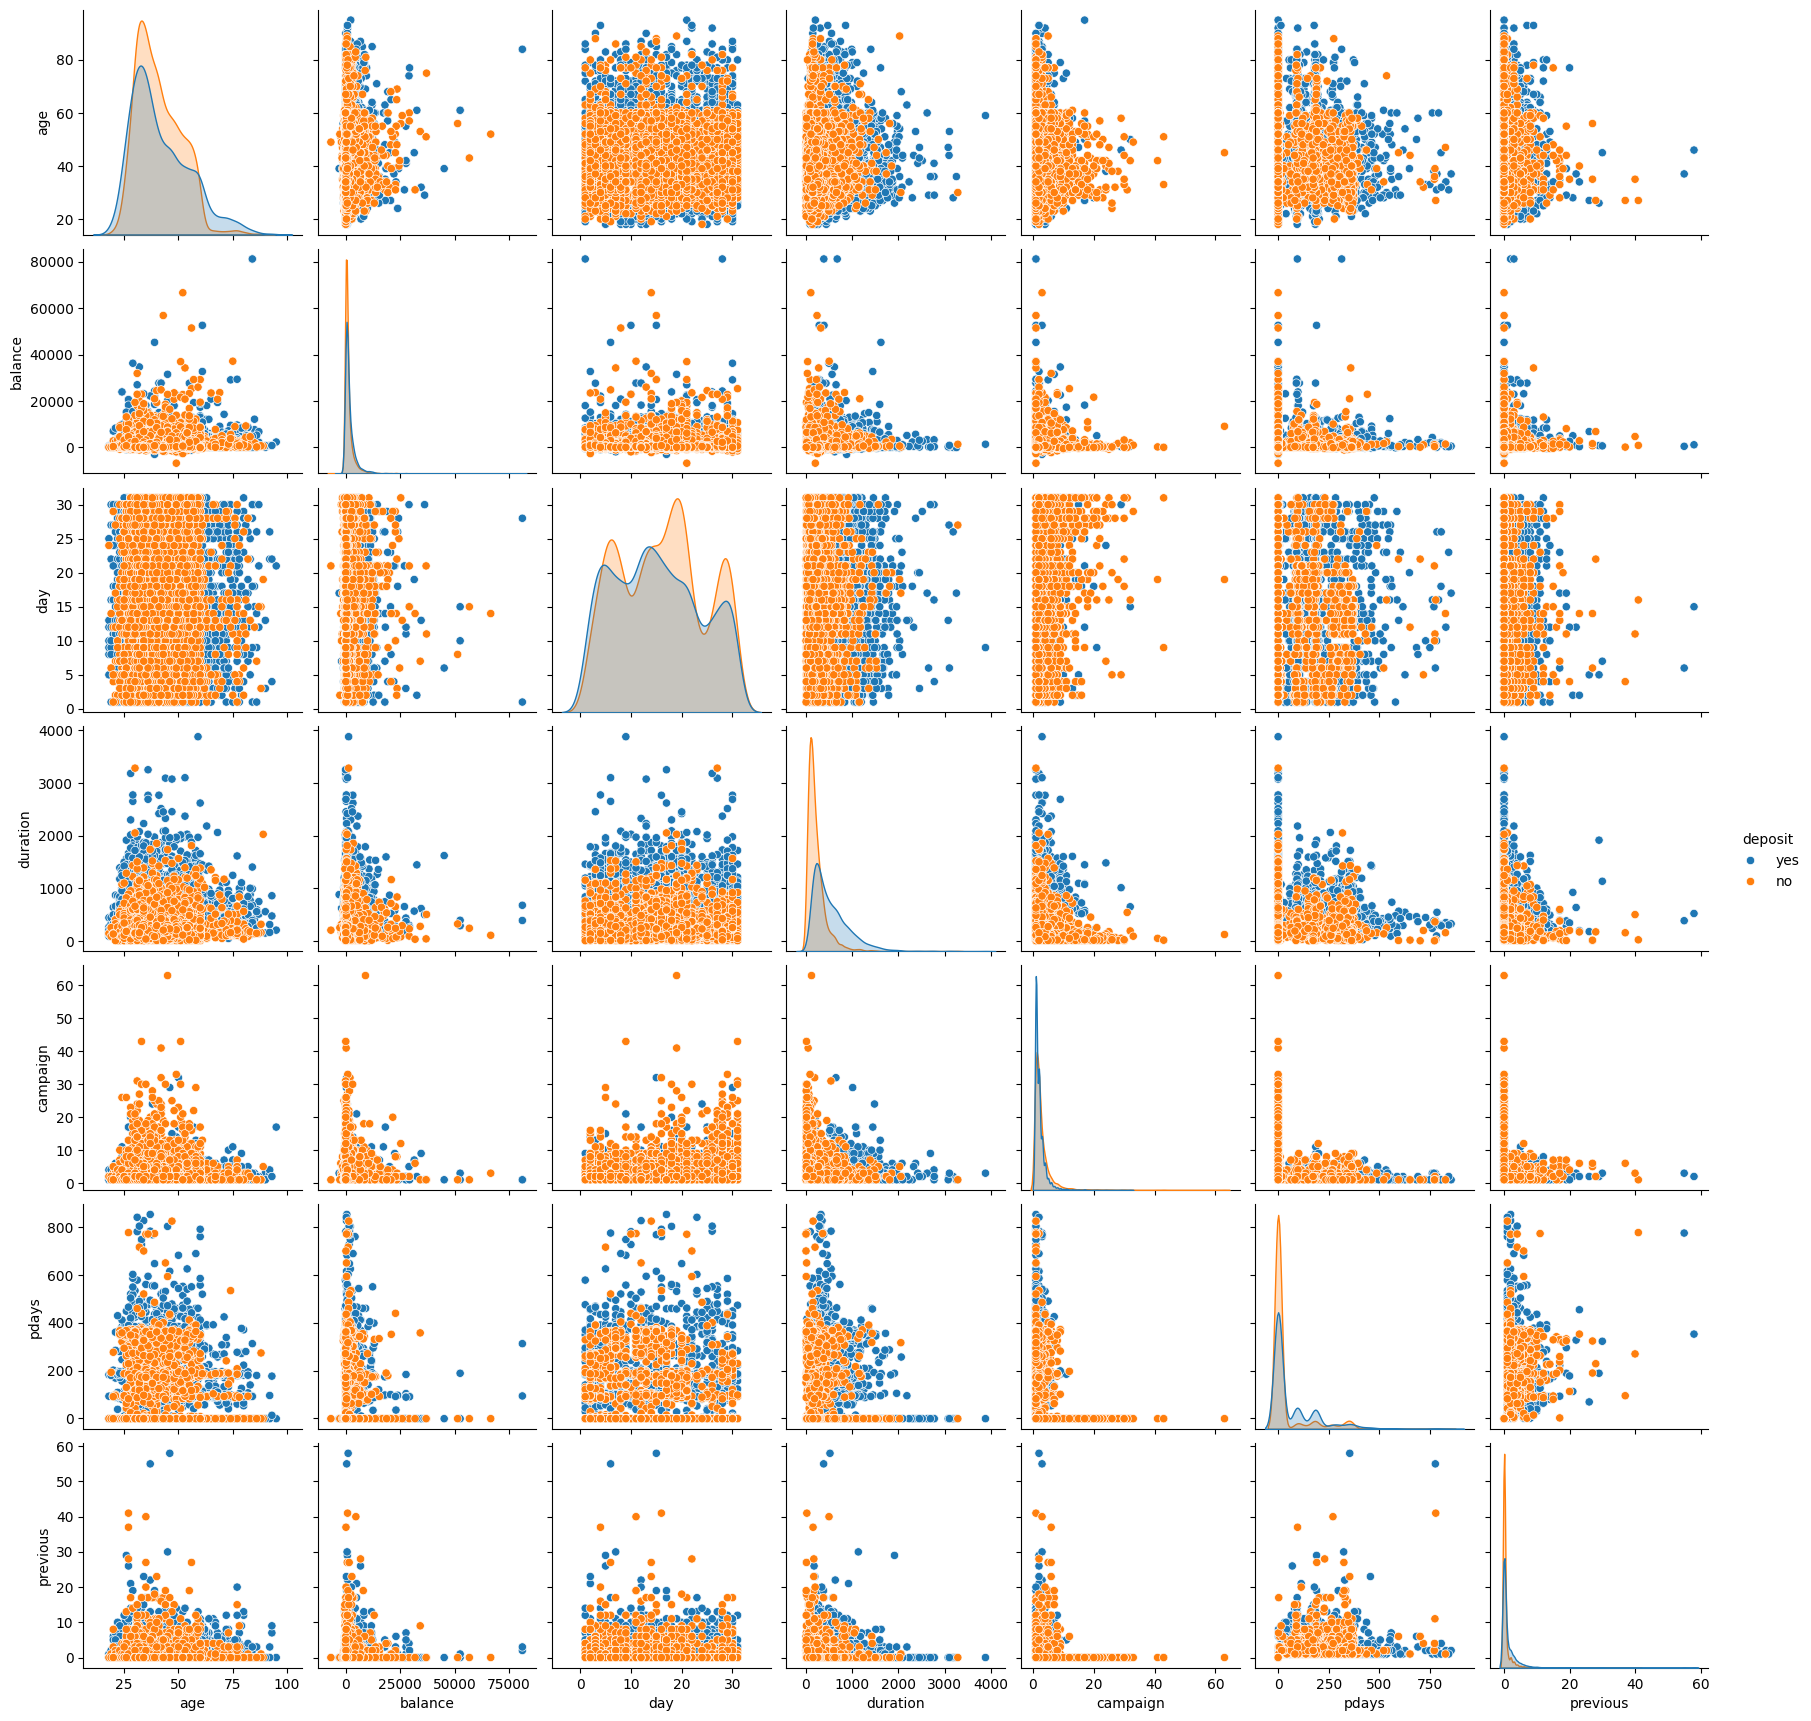

In [84]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df, vars=num_cols, hue='deposit')

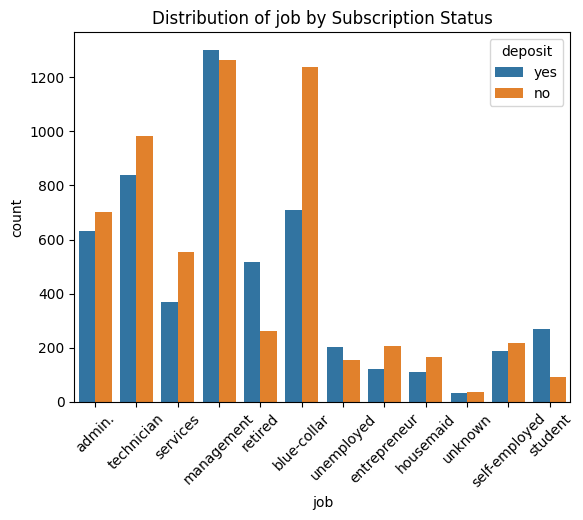

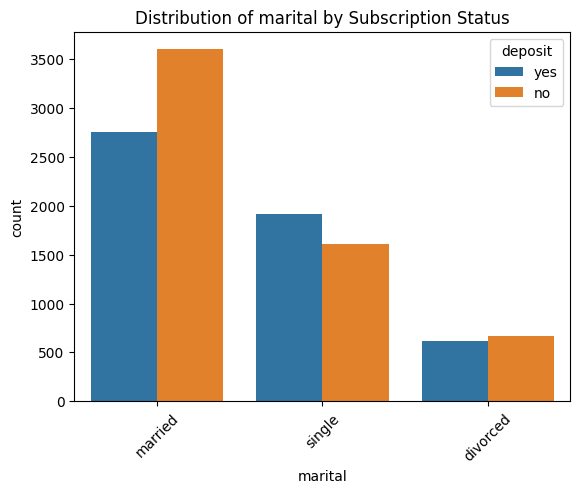

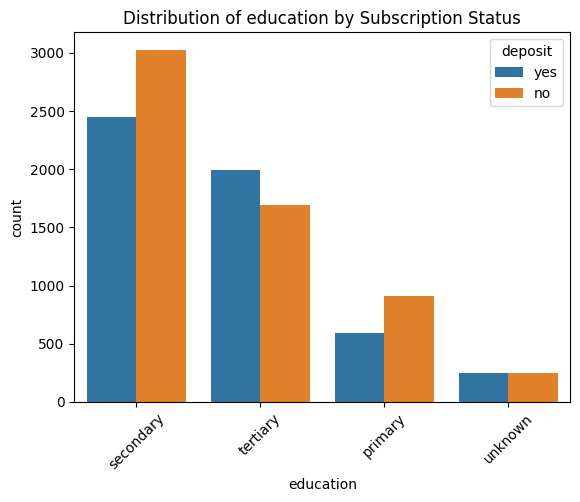

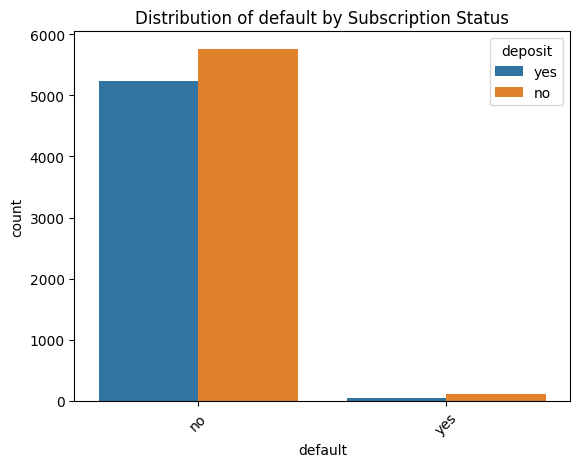

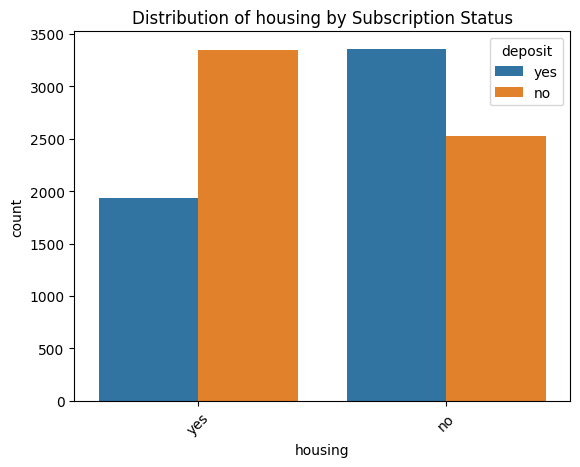

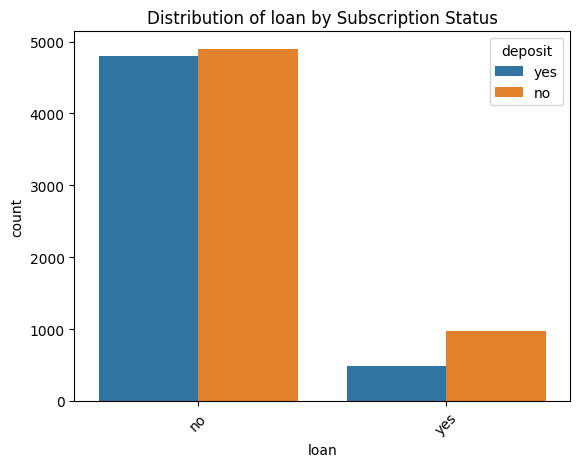

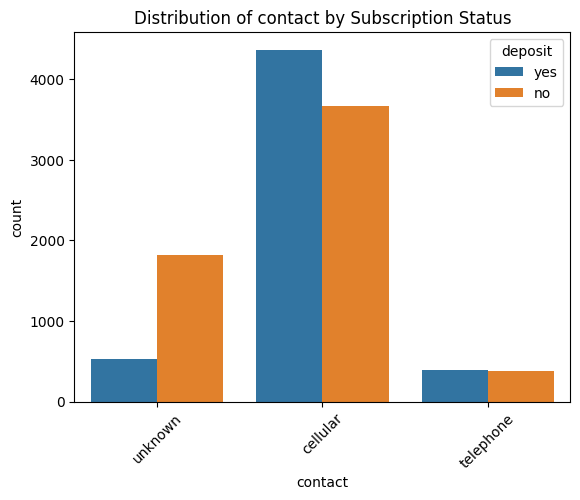

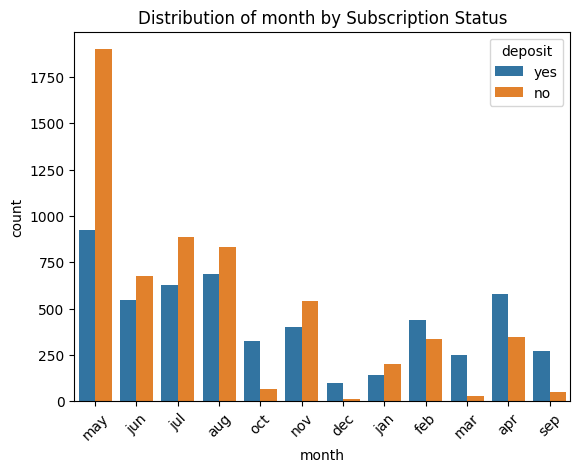

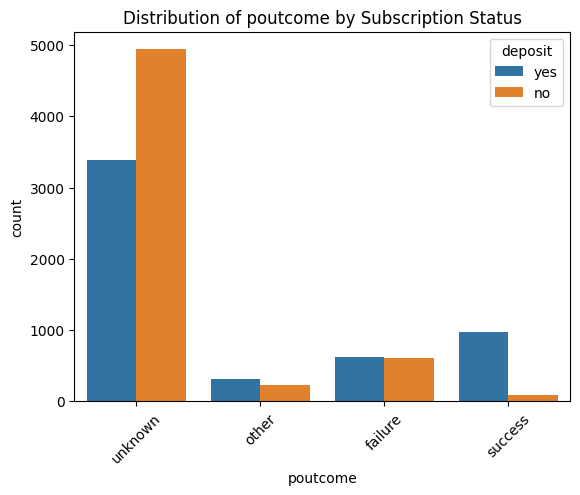

In [85]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('deposit')

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='deposit')
    plt.title(f'Distribution of {col} by Subscription Status')
    plt.xticks(rotation=45)
    plt.show()

In [86]:
# df['deposit_numeric'] = df['deposit'].map({'yes': 1, 'no': 0})

# plt.figure(figsize=(12, 10))
# sns.heatmap(df[num_cols + ['deposit_numeric']].corr(), square=True, annot=True, fmt='.4f', cmap='coolwarm')

### Kiểm tra dữ liệu khuyết

In [87]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Huấn luyện mô hình

In [88]:
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

In [89]:
df = pd.get_dummies(df)
df.shape

(11162, 52)

In [90]:
X = df.drop(['deposit', 'duration'], axis=1)
y = df['deposit']

In [91]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=99)

### Huấn luyện KNN

In [92]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [93]:
train_scores = knn.score(X_train, y_train)
train_scores

0.7318848695262627

In [94]:
test_score = knn.score(X_test, y_test)
test_score

0.5826242722794447

### Cải thiện mô hình

In [95]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=99)

k_list = list(range(1, 31, 1))
train_scores = []
valid_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    valid_scores.append(knn.score(X_valid, y_valid))

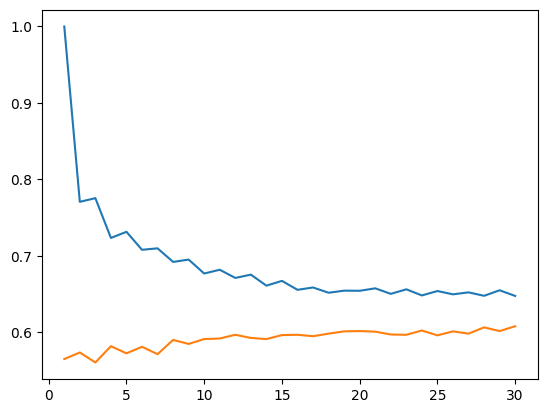

In [96]:
plt.plot(k_list, train_scores)
plt.plot(k_list, valid_scores)

In [97]:
k_opt = np.argmax(valid_scores)
k_opt

29

In [98]:
knn = KNeighborsClassifier(n_neighbors=k_opt)
knn = knn.fit(X_train, y_train)

In [99]:
knn.score(X_test, y_test)

0.6018808777429467

In [100]:
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1152
           1       0.62      0.46      0.53      1081

    accuracy                           0.60      2233
   macro avg       0.61      0.60      0.59      2233
weighted avg       0.61      0.60      0.59      2233



In [101]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      1152
           1       0.75      0.56      0.64      1081

    accuracy                           0.70      2233
   macro avg       0.71      0.69      0.69      2233
weighted avg       0.71      0.70      0.69      2233

